# Spectral clustering algorithm (spectral relaxation of K-means using Kernel-PCA)

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv

#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')

In [2]:
def calculate_euclidean_dist():
    euclidean_distance = pdist(data, 'sqeuclidean')#computes pairwise euclidean distance betwwen the vectors
    distance_matrix= squareform(euclidean_distance)
    return distance_matrix

In [3]:
def choose_kernel(kernel, distance_matrix):
    if kernel == 0:
        #poly kernel
        # Uncomment below code for library function
        #K = sklearn.metrics.pairwise.polynomial_kernel(distance_matrix, degree=2, coef0=1)  
        K = (1 + distance_matrix.transpose()@distance_matrix)
        # for degree = 2
        K = K @ K
        
    elif kernel == 1:
        #RBF kernel
        gamma = 0.05
        K = np.exp(-gamma * distance_matrix)
        #K = sklearn.metrics.pairwise.rbf_kernel(data, gamma = 0.05)
    return K

In [4]:
def calculate_principle_components(K):
    #Calculate eigenvalues and eigenvectors of kernel matrix
    n_components = 2
    eigenvals, eigenvecs = LA.eigh(K)
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]  #eigenvecs is a 1000*1000 matrix here
    # Collect the top k eigenvectors (projected examples)
    principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

    #Normalization
    N = K.shape[0]
    principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)

    return principal_components

In [5]:
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    seed = [111, 1234, 0, 30000, 934524]
    
    #initial assignment (random)
    for i in range(n_clusters):
        #random.seed(seed[i])
        centroid_current_cluster = X[np.random.choice(range(n_samples))]
        #centroid_current_cluster = X[random.randint(1, 1000)]
        centroids[i] = centroid_current_cluster

    return centroids

In [6]:
def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

In [7]:
def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid

    return centroids

K-Means Converged
K-Means Converged


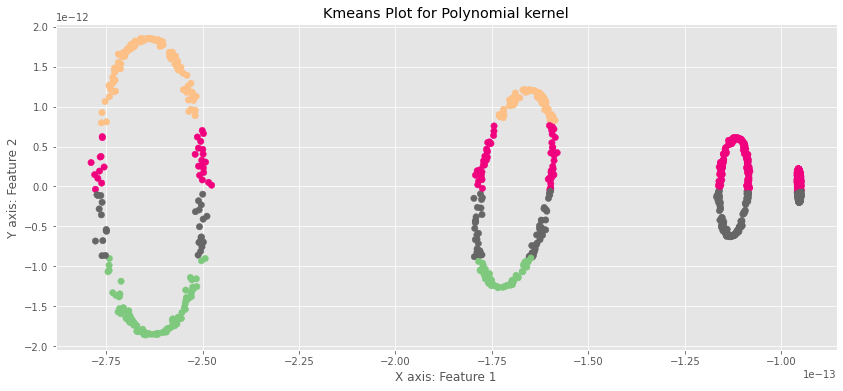

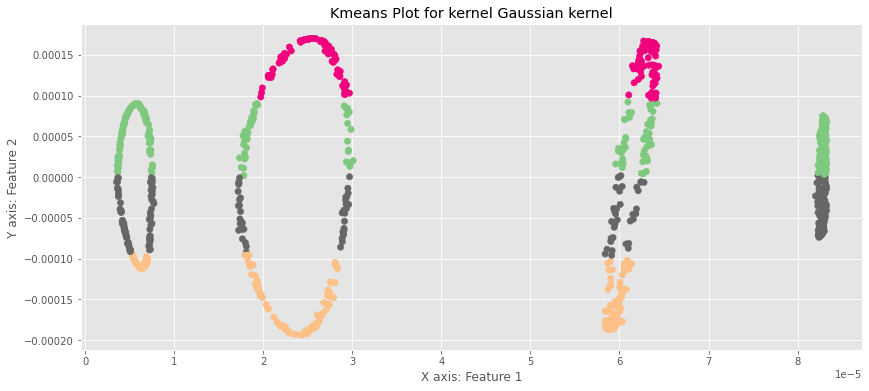

In [8]:
kernel_types = [0,1]
for i in kernel_types:
    #Samples and featurees
    distance_matrix = calculate_euclidean_dist()
    K = choose_kernel(i, distance_matrix)
    X = calculate_principle_components(K)
    n_clusters = 4
    n_samples=1000
    n_samples = X.shape[0] #returns 1000
    n_features = X.shape[1] #returns 2
    
    centroids = centroid_initialization(X, n_clusters)
    current_clusters = cluster_assignment(X , centroids, n_clusters)
    update_centroids(X , current_clusters, n_clusters)
    
    n_iter = 1000
    centroids = centroid_initialization(X, n_clusters)
    for it in range(n_iter):
        clusters = cluster_assignment(X, centroids, n_clusters)
        previous_centroids = centroids.copy()
        centroids = update_centroids(X, clusters, n_clusters)
        diff = centroids - previous_centroids
        
                  
        if not diff.any():
            print("K-Means Converged")
            break
          
    #Assigning clusters_ids to all data points
    with plt.style.context(('ggplot')):
        plt.figure(figsize=(14, 6))
        plt.xlabel("X axis: Feature 1")
        plt.ylabel("Y axis: Feature 2")
        if i == 0:
            plt.title("Kmeans Plot for Polynomial kernel")
        if i == 1:
            plt.title("Kmeans Plot for kernel Gaussian kernel")
            
        y_pred = np.zeros(n_samples)
        for cluster_id, cluster in enumerate(clusters):
            for index in cluster:
                y_pred[index] = cluster_id
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap= 'Accent')